In [27]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
plots_dir = "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots_darksky/"

# Initialize

In [43]:
mainmc = 100
submc = 20
halos = 1000


# plot_mc_loc0 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_loc0/',
#                         elephant=False, 
#                         nmc=submc, 
#                         halos_ran=halos, 
#                         halos_to_keep=halos,
#                         data_type="mc",
#                         bcut=20,
#                         nonoverlap=True,
#                         nonoverlapradius=2.,
#                         cut_0p5=False,
#                         xsecslim=10,
#                         TS100=4,
#                         TS1000=9,
#                         file_prefix='LL2_TSmx_lim_b_noJprof_o')


plot_mc_noJerr_loc0 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_noJerr_loc0//',
                        elephant=False, 
                        nmc=submc, 
                        halos_ran=halos, 
                        halos_to_keep=halos,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        file_prefix='LL2_TSmx_lim_b_noJprof_o')


plot_mc_redcvirerr_loc0 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_redcvirerr_loc0/',
                        elephant=False, 
                        nmc=submc, 
                        halos_ran=halos, 
                        halos_to_keep=halos,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9)

plot_mc_redmvirerr_loc0 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_redmvirerr_loc0/',
                        elephant=False, 
                        nmc=submc, 
                        halos_ran=halos, 
                        halos_to_keep=halos,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9)

# Plot

In [44]:
mc_ary_noJerr, _, _ = plot_mc_noJerr_loc0.return_limits()
mc_redcvirerr_ary, _,_ = plot_mc_redcvirerr_loc0.return_limits()
mc_redmvirerr_ary, _,_ = plot_mc_redmvirerr_loc0.return_limits()

In [64]:
plot_ary0 = np.percentile(np.load("mc_ary0.npy")[-1], 50, axis=1)

In [45]:
plot_noJerr = np.percentile(mc_ary_noJerr[-1], 50, axis=1)
plot_redcvirerr = np.percentile(mc_redcvirerr_ary[-1], 50, axis=1)
plot_redmvirerr = np.percentile(mc_redmvirerr_ary[-1], 50, axis=1)

In [46]:
work_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/LimitPlot//'
plots_dir = '/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots/'
data_dir = work_dir + 'data/'

data_file_names =[ data_dir + f for f in ['stath_max-lim.dat','stath_min-lim.dat','statp_q16-lim.dat','statp_q84-lim.dat',
                  'Jcm_q16-lim.dat','Jcm_q84-lim.dat','GCE.dat','FermiDwarf.dat','nominal-data.dat','gce-abazajian.dat',
                                         'gce-calore.dat','gce-gordon.dat','thermal-relic.dat'  ] ]

data_files = [np.loadtxt(f) for f in data_file_names]

####Poisson error bands
massP = 10**data_files[2][::,0]
Lim16 = 10**data_files[2][::,1]
Lim84 = 10**data_files[3][::,1]
LimP_disp = (np.log10(Lim84) - np.log10(Lim16))/2.0

####Halo Stat error bands
massH = 10**data_files[4][::,0]
LimH16 = 10**data_files[4][::,1]
LimH84 = 10**data_files[5][::,1]
LimH_disp = (np.log10(LimH84) - np.log10(LimH16))/2.0


#####Combine the uncertainties
Lim_uncert = np.sqrt(LimP_disp**2 + LimH_disp**2)

###GCE
GCE = data_files[6]
GCE_ab = data_files[9]
GCE_calore = data_files[10]
GCE_gordan = data_files[11]

###Fermi Dwarf
massD = 10**data_files[8][::,0]
LimD = 10**data_files[8][::,1]

#####thermal
thermal = 10**data_files[12]

###Cross Corr
mDM_ary = [10,20,50,100,200,300,400,500,700,1000,10000]
# lim_ary = np.array(np.array([[  3.47613312e-25,   3.19993932e-25,   4.09432255e-25,
#           5.74111275e-25,   8.19273323e-25,   1.11412925e-24,
#           1.54077804e-24,   1.88342427e-24,   2.45742289e-24,
#           3.51413849e-24,   1.88285952e-23],
#        [  6.84653178e-25,   6.11339438e-25,   8.88586835e-25,
#           1.46856813e-24,   2.37706561e-24,   3.06228027e-24,
#           3.78778553e-24,   4.28537842e-24,   5.06539081e-24,
#           6.20444331e-24,   3.37611100e-23]]))


In [47]:
marr = np.array([1.00000000e+01,1.50000000e+01,2.00000000e+01,2.50000000e+01,3.00000000e+01,4.00000000e+01,5.00000000e+01,6.00000000e+01,7.00000000e+01,8.00000000e+01,9.00000000e+01,1.00000000e+02,1.10000000e+02,1.20000000e+02,1.30000000e+02,1.40000000e+02,1.50000000e+02,1.60000000e+02,1.80000000e+02,2.00000000e+02,2.20000000e+02,2.40000000e+02,2.60000000e+02,2.80000000e+02,3.00000000e+02,3.30000000e+02,3.60000000e+02,4.00000000e+02,4.50000000e+02,5.00000000e+02,5.50000000e+02,6.00000000e+02,6.50000000e+02,7.00000000e+02,7.50000000e+02,8.00000000e+02,9.00000000e+02,1.00000000e+03,1.10000000e+03,1.20000000e+03,1.30000000e+03,1.50000000e+03,1.70000000e+03,2.00000000e+03,2.50000000e+03,3.00000000e+03,4.00000000e+03,5.00000000e+03,6.00000000e+03,7.00000000e+03,8.00000000e+03,9.00000000e+03,1.00000000e+04])

In [12]:
igrb_lim = np.load("igrb_lim.npy")
igrb_mchi = np.load("igrb_mchi.npy")

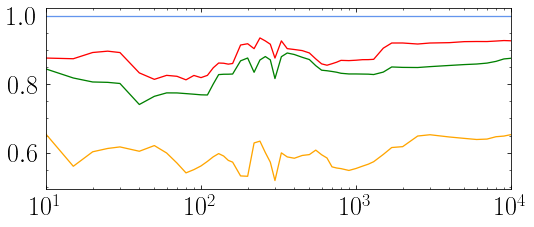

In [104]:
fig,ax = plt.subplots(1,figsize=(10/1.2,4/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(marr, (10**plot_ary0/10**plot_ary0)**-1, label='Baseline', color='cornflowerblue', lw=1.3)

plt.plot(marr, (10**plot_ary0/10**plot_redcvirerr)**-1, label='Reduce $\sigma_c_\mathrm{vir}$', color='green', lw=1.3)

plt.plot(marr, (10**plot_ary0/10**plot_redmvirerr)**-1, label=r'Reduce $\sigma_M_\mathrm{vir}$', color='red', lw=1.3)

plt.plot(marr, (10**plot_ary0/10**plot_noJerr)**-1, label='No uncertainty', color='orange', lw=1.3)
plt.xlim([1e1,1e4])
plt.xscale('log')

plt.xticks(fontsize=26);
plt.yticks(fontsize=26);


# plt.yscale('log')


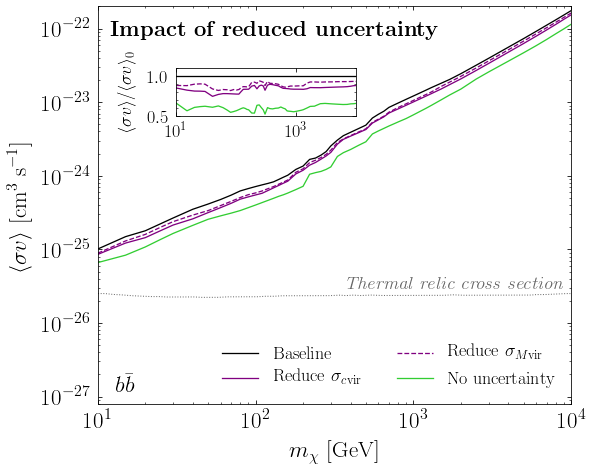

In [133]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(marr, 10**plot_ary0, label='Baseline', color='k', lw=1.3)

plt.plot(marr, 10**plot_redcvirerr, label='Reduce $\sigma_c_\mathrm{vir}$', color='purple', lw=1.3)

plt.plot(marr, 10**plot_redmvirerr, label=r'Reduce $\sigma_M_\mathrm{vir}$', color='purple', lw=1.3, ls='--')

plt.plot(marr, 10**plot_noJerr, label='No uncertainty', color='limegreen', lw=1.3)



# plt.fill_between(marr,10**np.percentile(lim_ary[-1], 16, axis=1),10**np.percentile(lim_ary[-1], 84, axis=1), alpha=0.4, color='cornflowerblue',label='\\texttt{DarkSky} Location 1')
# plt.fill_between(marr,10**np.percentile(combination, 16, axis=0),10**np.percentile(combination, 84, axis=0), alpha=0.4, color='forestgreen',label='Median \\texttt{DarkSky} Locations')
plt.axhline(np.log10(3e-26), ls = '--', color='grey')
plt.xscale("log")
plt.xlim(10,10000)
plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$\,s$^{-1}$]")
plt.xlabel("$m_\chi$")
plt.legend()
# plt.plot(plot_data.marr,10**np.percentile(data_ary_10k[-1], 2.5, axis=1), alpha=1, color='k',label=r'10k halos',ls=':')




plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

# plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
# plt.text(75., 1.5e-27, r'Non-overlapping halos and halo number',fontsize=20,color='black')

plt.legend(ncol=2,fancybox=True,facecolor='none',frameon=False,loc='lower right')

plt.text(12,8e-23, "\\textbf{Impact of reduced uncertainty}",fontsize=22)
plt.text(13,1.2e-27,"$b\\bar b$",fontsize=23)

# this is an inset axes over the main axes
a = plt.axes([.3, .75, .3, .1])
# fig,ax = plt.subplots(1,figsize=(10/1.2,4/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(marr, (10**plot_ary0/10**plot_ary0)**-1, label='Baseline', color='k', lw=1.3)

plt.plot(marr, (10**plot_ary0/10**plot_redcvirerr)**-1, label='Reduce $\sigma_c_\mathrm{vir}$', color='purple', lw=1.3)

plt.plot(marr, (10**plot_ary0/10**plot_redmvirerr)**-1, label=r'Reduce $\sigma_M_\mathrm{vir}$', color='purple', lw=1.3, ls='--')

plt.plot(marr, (10**plot_ary0/10**plot_noJerr)**-1, label='No uncertainty', color='limegreen', lw=1.3)
plt.xlim([1e1,1e4])
plt.xscale('log')

plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

plt.ylim(.5,1.1)
plt.tight_layout()
plt.ylabel("$\langle \sigma v \\rangle$/$\langle \sigma v \\rangle_\mathrm{0}$", fontsize=18)
# plt.xlabel(r"$m_\chi$ [GeV]",fontsize=18)

plt.savefig(plots_dir + 'darksky_reduced_err.pdf',bbox_inches='tight')